<a href="https://colab.research.google.com/github/iamkunalaggarwal/450_solutions/blob/main/rnn_on_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17473536/17464789 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1654784/1641221 [==============================] - 0s 0us/step
you
! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0
17473536/17464789 [==============================] - 0s 0us/step
130
130
130
130
130
130
130
130
130
130
! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


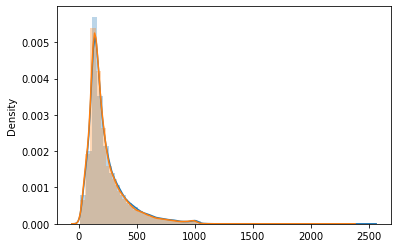

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path="ibdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)



unique, counts = np.unique(Y_train, return_counts=True)

unique, counts = np.unique(Y_test, return_counts=True)


d = X_train[0]


review_len_train = []
review_len_test = []
for i, ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

sns.distplot(review_len_train, hist_kws={"alpha": 0.3})
sns.distplot(review_len_test, hist_kws={"alpha": 0.3})


# number of words
word_index = imdb.get_word_index()

for keys, values in word_index.items():
    if values == 22:
        print(keys)


def whatItSay(index=24):
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review


decoded_review = whatItSay(36)

#Preprocess

num_words = 15000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)

maxlen = 130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


for i in X_train[0:10]:
    print(len(i))

decoded_review = whatItSay(5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
196/196 [==============================] - 38s 173ms/step - loss: 0.6616 - acc: 0.6023 - val_loss: 0.5791 - val_acc: 0.7124
Epoch 2/5
196/196 [========================

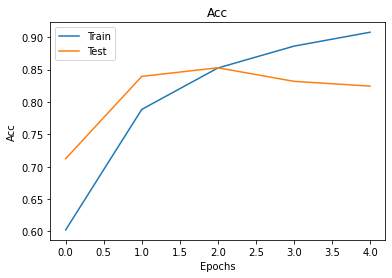

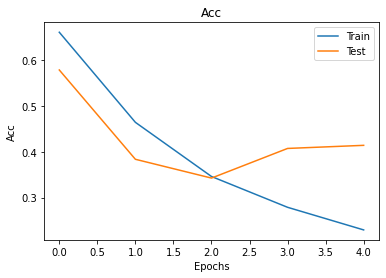

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words,maxlen), return_sequences= False, activation= "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer="rmsprop",metrics= ["acc"])

history = rnn.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs=5, batch_size= 128, verbose=1)
rnn.save('model.h5')
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %",score[1]*100)

plt.figure()
plt.plot(history.history["acc"], label = "Train")
plt.plot(history.history["val_acc"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()